# Notebook finds parameters from lognorm to truncnorm and vice versa

In [30]:
# Load necessary libraries
library(truncnorm)
library(MASS)
library(ggplot2)


set.seed(123)


# function finds for given moments of an truncnorm distribution with a = 0 and b = Inf the best lognorm distribution
find_lognorm_from_truncnorm <- function(mu, sigma, plot = T){
  
  a <- 0  # lower truncation point
  b <- Inf  # upper truncation point
  trunc_norm_data <- rtruncnorm(100000, a, b, mean = mu, sd = sigma)
  
  # define neg log likelihood
  log_likelihood <- function(params, data) {
    mu_log <- params[1]
    sigma_log <- params[2]
    return(-sum(dlnorm(data, meanlog = mu_log, sdlog = sigma_log, log = TRUE)))
  }
  init_params <- c(mean(log(trunc_norm_data)), sd(log(trunc_norm_data)))
  fit <- optim(init_params, log_likelihood, data = trunc_norm_data, method = "L-BFGS-B",
               lower = c(-10, 0.0001), upper = c(100, 100))
  
  mu_log <- fit$par[1]
  sigma_log <- fit$par[2]
  
  g <- NULL
  if(plot){
    g <- ggplot() +
      geom_histogram(aes(x = trunc_norm_data, y = ..density..), bins = 50, fill = "steelblue1", alpha = 0.6) +
      stat_function(fun = function(x) dlnorm(x, meanlog = mu_log, sdlog = sigma_log),
                    color = "steelblue", size = 1) +
      labs(x = "Value", y = "Density") +
      ggtitle("Fit of Log-normal Distribution to Truncated Normal Data") +
      theme_minimal()
  }
  
  return(list(mu = mu_log, sd = sigma_log, plot = g))
}


# function for the other case, i.e. lognorm to truncnorm
find_truncnorm_from_lognorm <- function(mu_log, sigma_log, plot = TRUE) {
  
  log_norm_data <- rlnorm(100000, meanlog = mu_log, sdlog = sigma_log)
  
  # define neg log likelihood
  log_likelihood_truncnorm <- function(params, data) {
    mu <- params[1]
    sigma <- params[2]
    
    # truncnorm does not have loglikelihood Oo - hence, build it from hand
    return(-sum(log(dtruncnorm(data, a = 0, b = Inf, mean = mu, sd = sigma))))
  }
  
  mu_init <- mean(log_norm_data)
  sigma_init <- sd(log_norm_data)
  init_params <- c(mu_init, sigma_init)
  
  fit <- optim(init_params, log_likelihood_truncnorm, data = log_norm_data, method = "L-BFGS-B",
               lower = c(-200, 0.0001), upper = c(100, 100))
  
  mu <- fit$par[1]
  sigma <- fit$par[2]
  

  g <- NULL
  if(plot) {
    g <- ggplot() +
      geom_histogram(aes(x = log_norm_data, y = ..density..), bins = 50, fill = "steelblue1", alpha = 0.6) +
      stat_function(fun = function(x) dtruncnorm(x, a = 0, b = Inf, mean = mu, sd = sigma),
                    color = "steelblue", size = 1) +
      labs(x = "Value", y = "Density") +
      ggtitle("Fit of Truncated Normal Distribution to Log-normal Data") +
      theme_minimal()
  }
  
  return(list(mu = mu, sd = sigma, plot = g))
}


$mu
[1] 3.097054

$sd
[1] 0.1857366

$plot


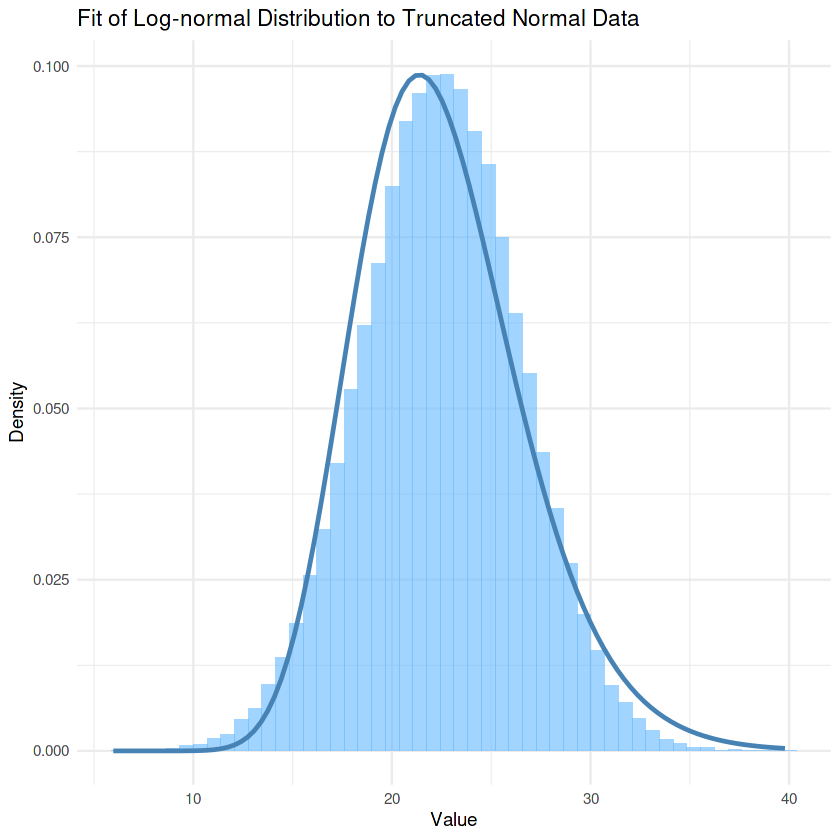

In [31]:
## M1a
# C_Rn_old
find_lognorm_from_truncnorm(22.5, 4)

$mu
[1] 3.296464

$sd
[1] 0.1513905

$plot


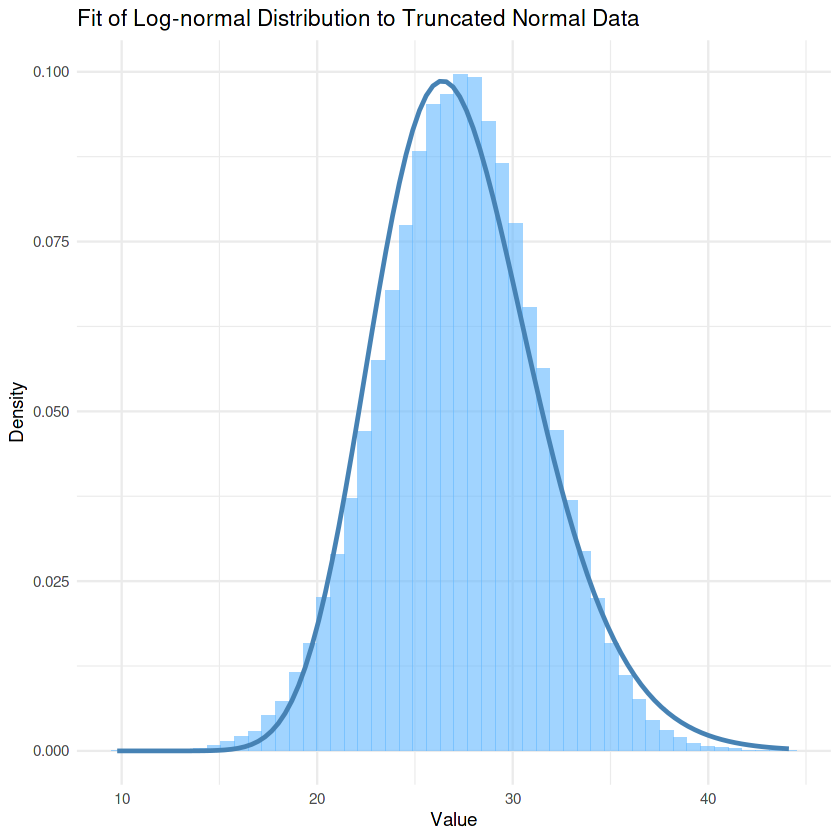

In [32]:
## M1a
# C_Rn_ref
find_lognorm_from_truncnorm(27.3, 4)

$mu
[1] 1.887864

$sd
[1] 0.9852445

$plot


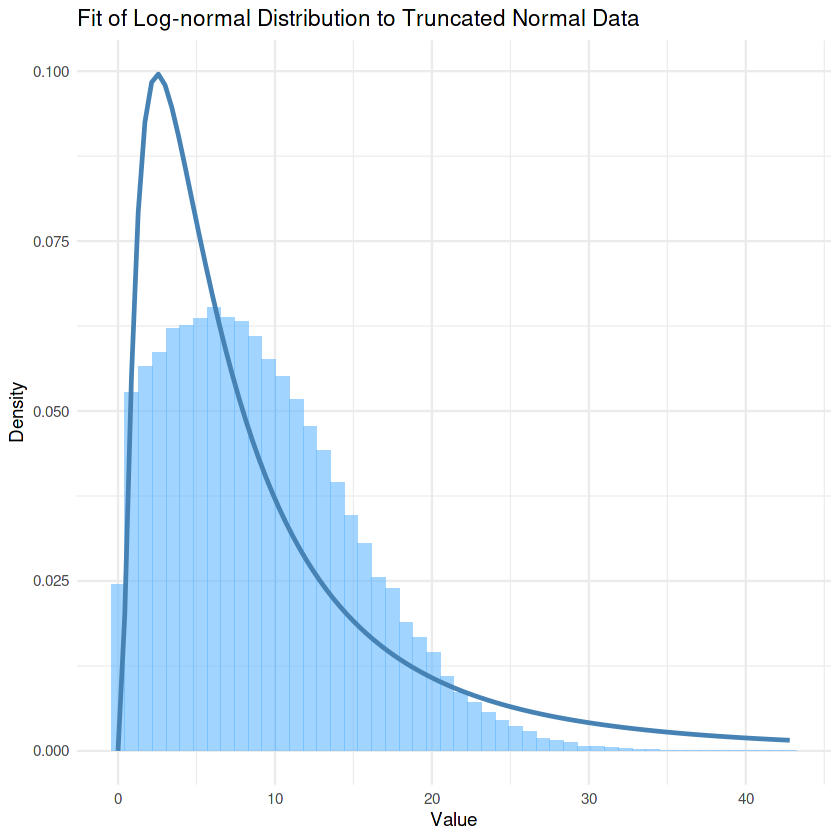

In [33]:
# M2
# C_Rn
find_lognorm_from_truncnorm(6, 8)

$mu
[1] -77.12443

$sd
[1] 27.34967

$plot


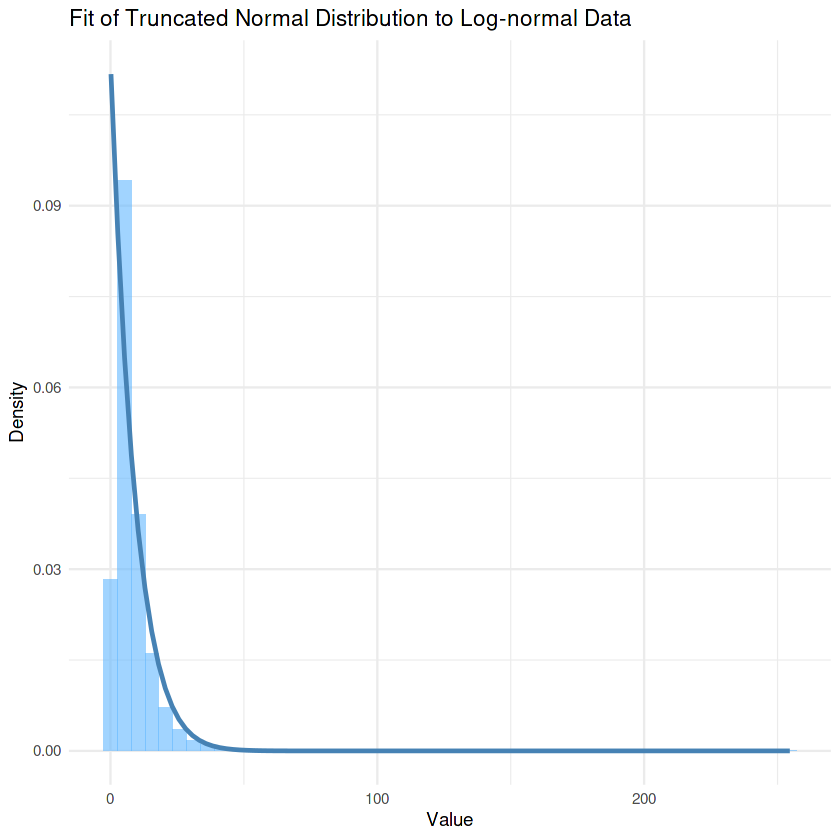

In [34]:
## M2_Expert
# C_Exp
find_truncnorm_from_lognorm(1.78, 0.79)

$mu
[1] -1.80017

$sd
[1] 0.9890602

$plot


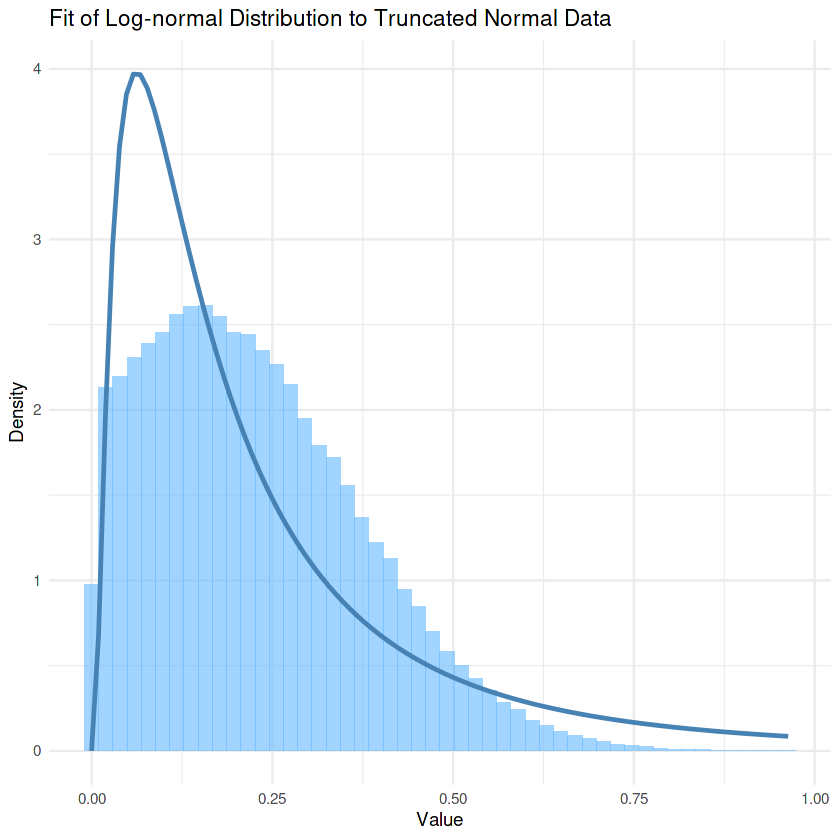

In [35]:
## M3
# C_RPD
find_lognorm_from_truncnorm(0.15, 0.2)

$mu
[1] -138.846

$sd
[1] 40.11283

$plot


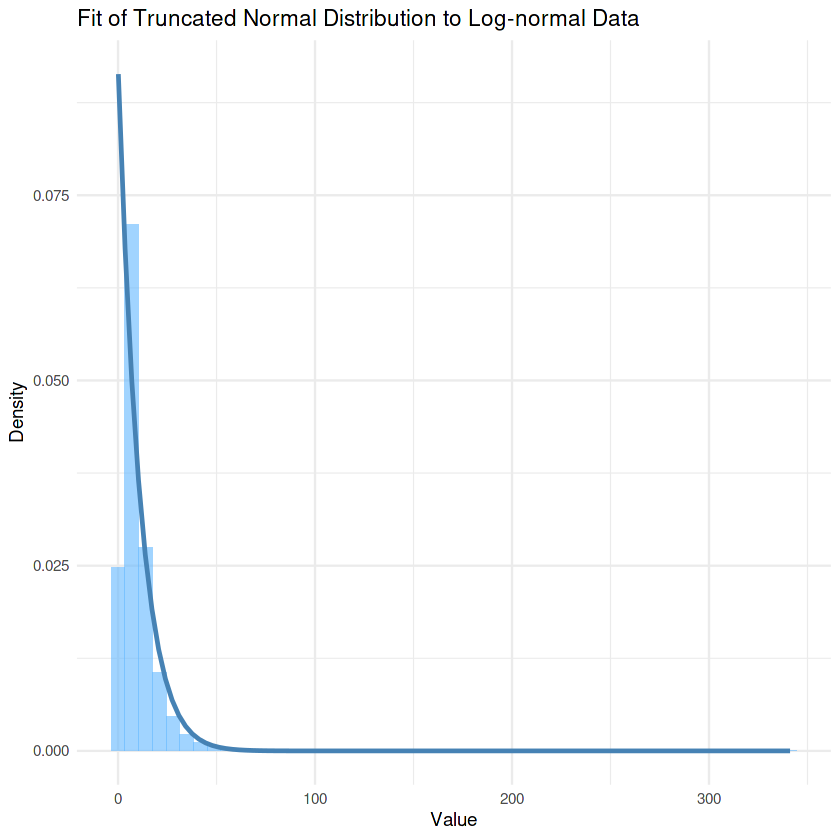

In [36]:
## M4
# E_Rn
find_truncnorm_from_lognorm(2, 0.8)